# Exploration et Préparation des données

Author: Pierre Fromont Boissel, Joséphine, Yann

Dans ce notebook, nous effectuons une exploration et préparation des données pour analyser et nettoyer un jeu de données sur la qualité des vins portugais "Vinho Verde".<br>
Nous commençons par charger les données et examiner leur structure, en identifiant les variables quantitatives et qualitatives. <br>
Ensuite, nous procédons au nettoyage des données en supprimant les valeurs manquantes et les doublons. <br>
Nous normalisons également les variables quantitatives pour les mettre sur une échelle comparable, ce qui est essentiel pour les analyses basées sur les distances. <br>
Par la suite, nous regroupons la variable cible quality en trois catégories (faible, moyenne, bonne) afin de simplifier le problème et de gérer le déséquilibre des classes. <br>
Enfin, nous appliquons la méthode SMOTE (Synthetic Minority Oversampling Technique) pour équilibrer les classes et visualisons les données avant et après l'équilibrage à l'aide d'une PCA (Analyse en Composantes Principales). <br>
Le fichier se termine avec un dataset prêt pour l'entraînement de modèles de classification.


## Sommaire

- [1. Compréhension des variables](#1-compréhension-des-variables)
  - [a. Chargement des données](#a-chargement-des-données)
  - [b. Aperçu du jeu de données](#b-apercu-du-jeu-de-données)
  - [c. Types des variables](#c-types-des-variables)
- [2. Nettoyage des données](#2-nettoyage-des-données)
  - [a. Suppression des valeurs manquantes](#a-suppression-des-valeurs-manquantes)
  - [b. Suppression des doublons](#b-suppression-des-doublons)
  - [c. Normalisation des features](#c-normalisation-des-features)
- [3. Regroupement de la variable `quality` et équilibrage des classes](#3-regroupement-de-la-variable-quality-et-équilibrage-des-classes)
  - [a. Visualisation de la distribution brute](#a-visualisation-de-la-distribution-brute)
  - [b. Regroupement des classes de qualité](#b-regroupement-des-classes-de-qualité)
  - [c. Encodage et séparation des variables](#c-encodage-et-séparation-des-variables)
  - [d. Visualisation avec PCA avant SMOTE](#d-visualisation-avec-pca-avant-smote)
  - [e. Application de SMOTE pour équilibrer les classes](#e-application-de-smote-pour-équilibrer-les-classes)
  - [f. Visualisation avec PCA après SMOTE](#f-visualisation-avec-pca-après-smote)
  - [g. Résultat final](#g-résultat-final)

## 1-Compréhension des variables

Dans cette section, nous identifions les variables quantitatives et qualitatives présentes dans le jeu de données. Cela nous permet de mieux comprendre la structure des données et de planifier les étapes suivantes de l'analyse.

In [239]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from typing import List, Union
from pandas import DataFrame, Index

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

### a. Chargement des données

Ce jeu de données est lié aux variantes rouges du vin portugais \"Vinho Verde\". Il décrit la quantité de divers composés chimiques présents dans le vin et leur effet sur sa qualité. 

#### Lien vers le dataset :
[Wine Quality Dataset (Kaggle)](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset?select=WineQT.csv)

In [240]:
# Chargement des données
path: str = os.path.join(os.path.dirname(
    os.getcwd()), "data", 'WineQT.csv')
data: pd.DataFrame = pd.read_csv(path, index_col='Id')

### b. Aperçu du jeu de données

In [241]:
# Informations générales
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


In [242]:
# Aperçu des données
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [243]:
# Statistiques descriptives
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### c. Types des variables

In [244]:
# Types de variables
quantitative_vars: list[str] = data.select_dtypes(
    include=['float64', 'int64']).columns.tolist()
print("Variables quantitatives :", quantitative_vars)
qualitative_vars: list[str] = data.select_dtypes(
    include=['object']).columns.tolist()
print("Variables qualitatives :", qualitative_vars)

Variables quantitatives : ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
Variables qualitatives : []


Dans ce dataset nous avons uniquement des variables quanitatives et aucune variable qualitative.

## 2-Nettoyage des données

### a. Suppression des valeurs manquantes

In [245]:
# Vérification des valeurs manquantes
missing_values: pd.Series = data.isnull().sum()
missing_columns: pd.Series = missing_values[missing_values > 0]

if not missing_columns.empty:
    print("Colonnes avec des valeurs manquantes :")
    for col, count in missing_columns.items():
        print(f"- {col} : {count} valeurs manquantes")

    # Suppression des lignes avec des valeurs manquantes
    initial_count: int = len(data)
    data: pd.DataFrame = data.dropna()
    final_count: int = len(data)
    print(f"{initial_count - final_count} lignes supprimées en raison de valeurs manquantes.")
else:
    print("Aucune valeur manquante détectée.")

Aucune valeur manquante détectée.


### b. Suppressions des doublons

In [246]:
# Doublons
if data.duplicated().sum() > 0:
    print(f"Doublons trouvés : {data.duplicated().sum()} lignes suprimées.")
    # Suppression des doublons
    data.drop_duplicates(inplace=True)
    data.reset_index(drop=True, inplace=True)
else:
    print("Aucun doublon trouvé.")

Doublons trouvés : 125 lignes suprimées.


### c. Normalisation des features

La normalisation est nécessaire pour mettre toutes les variables sur la même échelle afin d’éviter qu’une variable comme l’alcool, avec une amplitude plus grande, ne domine les autres dans les méthodes sensibles aux distances comme l’ACP ou le K-means.

In [247]:
# Sauvegarde de l'index Id
ids: Index = data.index.copy()

# Sélection des variables quantitatives (hors quality et Id si présent)
features: List[str] = data.drop(columns=["quality", "Id"], errors='ignore') \
    .select_dtypes(include=['float64', 'int64']).columns.tolist()

# Sous-ensemble des features
data_features: DataFrame = data[features]

# Normalisation avec StandardScaler
scaler: StandardScaler = StandardScaler()
data_normalized: DataFrame = pd.DataFrame(
    scaler.fit_transform(data_features),
    columns=features,
    index=ids  # pour garder la correspondance avec l’index d’origine
)

**Données avant la normalisation:**

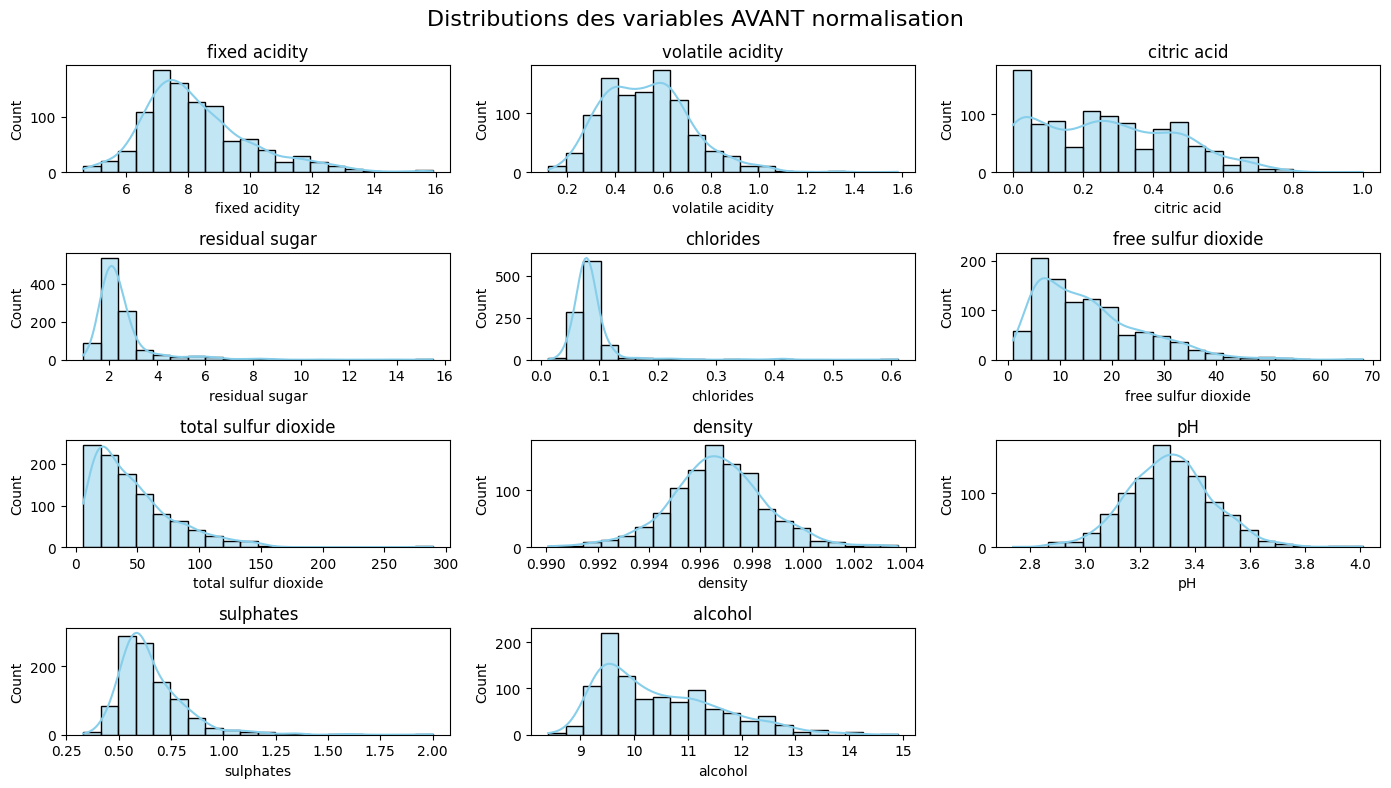

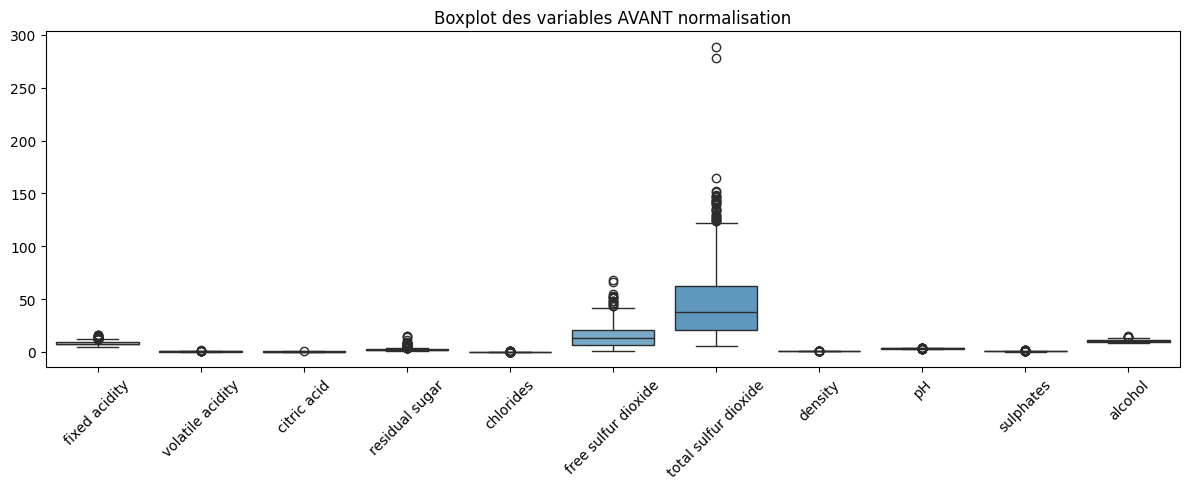

In [248]:
# Histoplot avant normalisation
plt.figure(figsize=(14, 8))
for i, column in enumerate(data_features.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data_features[column], bins=20,
                 kde=True, color="skyblue", edgecolor="black")
    plt.title(column)
plt.suptitle("Distributions des variables AVANT normalisation", fontsize=16)
plt.tight_layout()
plt.show()

# Boxplot avant normalisation
plt.figure(figsize=(12, 5))
sns.boxplot(data=data_features, palette="Blues")
plt.title("Boxplot des variables AVANT normalisation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Les histogrammes montrent que certaines variables comme `alcohol`, `residual sugar` ou `total sulfur dioxide` ont des échelles de valeurs beaucoup plus grandes que d'autres comme `chlorides` ou `sulphates`.  

Les boxplots confirment cette hétérogénéité : les amplitudes diffèrent fortement d'une variable à l'autre, ce qui pourrait biaiser les analyses basées sur la distance (comme l’ACP ou les clusters).  
Certaines variables montrent aussi des valeurs extrêmes (outliers), comme `total sulfur dioxide` ou `residual sugar`.

**Données après la normalisation:**

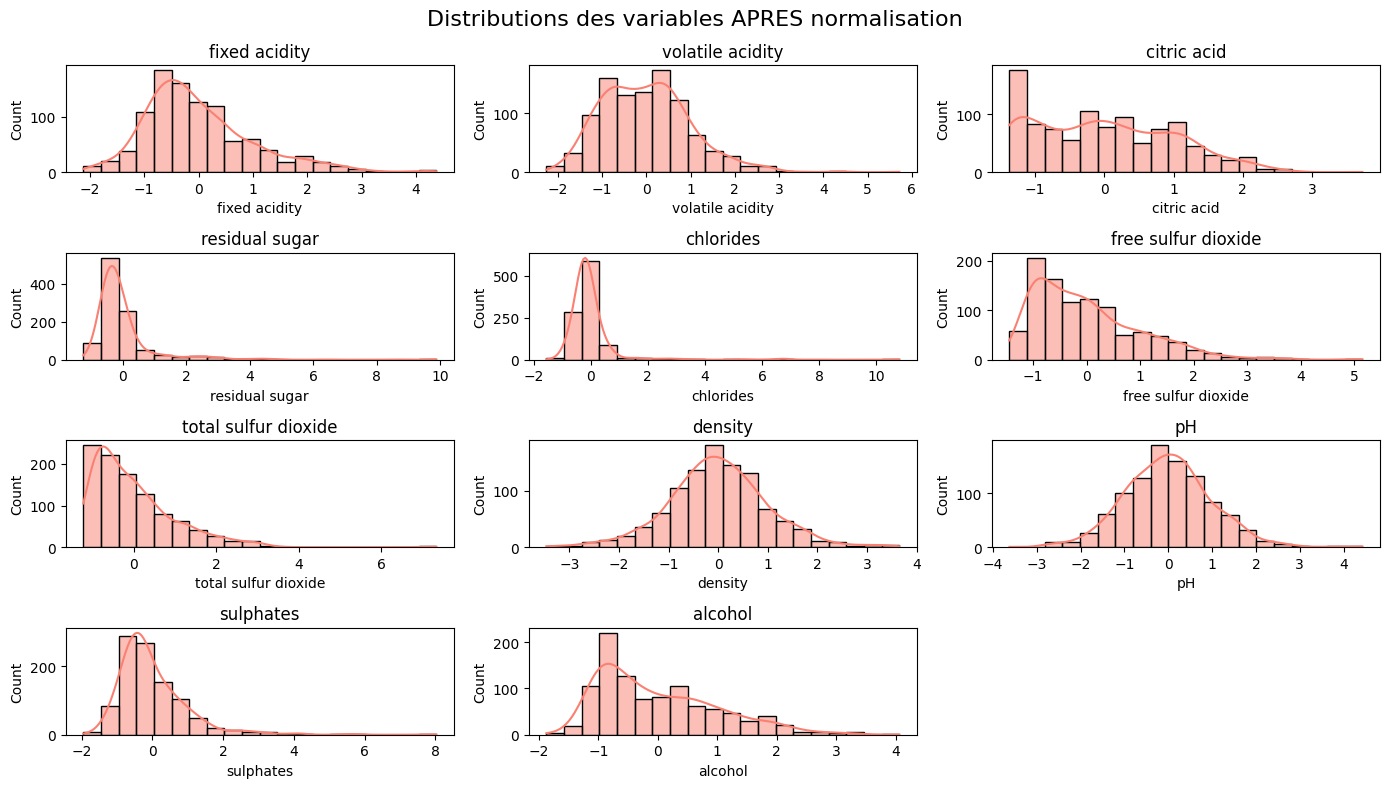

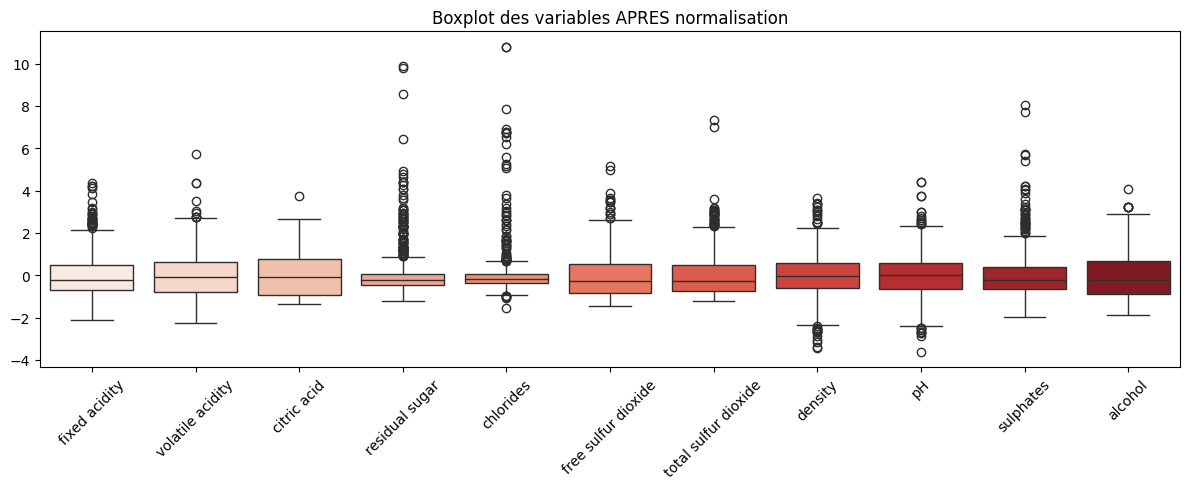

In [249]:
# Histoplot avant normalisation
plt.figure(figsize=(14, 8))
for i, column in enumerate(data_normalized.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data_normalized[column], bins=20,
                 kde=True, color="salmon", edgecolor="black")
    plt.title(column)
plt.suptitle("Distributions des variables APRES normalisation", fontsize=16)
plt.tight_layout()
plt.show()

# Boxplot avant normalisation
plt.figure(figsize=(12, 5))
sns.boxplot(data=data_normalized, palette="Reds")
plt.title("Boxplot des variables APRES normalisation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Après normalisation, toutes les variables ont une distribution centrée autour de 0 avec un écart-type d’environ 1. Cela rend les variables comparables, indépendamment de leur unité ou échelle initiale.  

Les boxplots montrent des amplitudes similaires entre toutes les variables, ce qui est essentiel pour appliquer des méthodes sensibles à l’échelle comme l’ACP, la K-means, ou les algorithmes à base de distances.  
Les valeurs extrêmes sont conservées mais deviennent moins influentes dans les calculs.

In [250]:
# Mise à jour du DataFrame avec les données normalisées
data[features] = data_normalized[features]
# On s'assure que l'index est bien "Id"
data.index.name = "Id"
# Vérification
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,-0.510499,0.909227,-1.370507,-0.475125,-0.230739,-0.457043,-0.372294,0.574517,1.258719,-0.578153,-0.961563,5
1,-0.280676,1.892418,-1.370507,0.057517,0.223040,0.919349,0.624466,0.052448,-0.707068,0.138438,-0.596108,5
2,-0.280676,1.236957,-1.166564,-0.170758,0.099282,-0.063788,0.231803,0.156862,-0.326593,-0.040710,-0.596108,5
3,1.672822,-1.384886,1.484700,-0.475125,-0.251365,0.132839,0.413032,0.678931,-0.960718,-0.458721,-0.596108,6
4,-0.510499,0.690740,-1.370507,-0.551216,-0.251365,-0.260415,-0.191065,0.574517,1.258719,-0.578153,-0.961563,5


## Regroupement de la variable quality et équilibrage des classes

### a. Visualisation :
**objectifs:**
- Comprendre la distribution de la variable quality (note de qualité du vin de 0 à 10).

- Détecter un éventuel déséquilibre des classes (valeurs rares vs. fréquentes).

- Décider si quality doit être :

    - utilisée comme variable continue dans une régression, 
    - ou regroupée en classes pour une classification (e.g., "faible", "moyenne", "bonne").

- Choisir une stratégie d’équilibrage si besoin

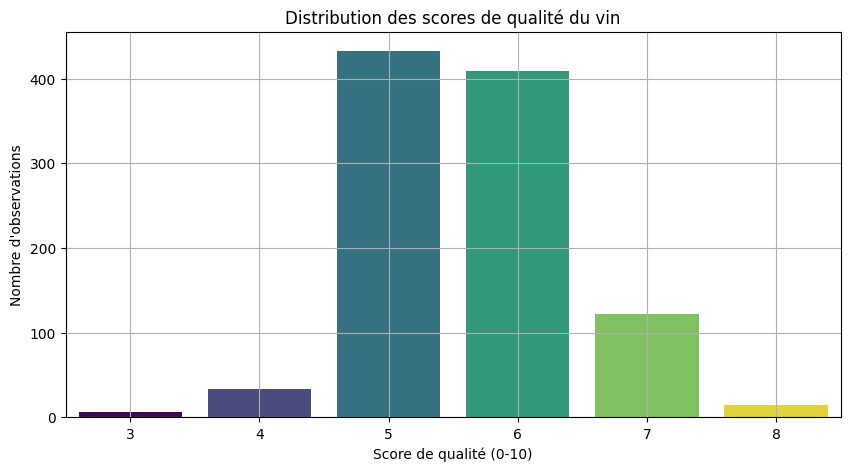

Effectifs par score de qualité :
 quality
3      6
4     33
5    433
6    409
7    122
8     15
Name: count, dtype: int64

Fréquences relatives :
 quality
3    0.006
4    0.032
5    0.425
6    0.402
7    0.120
8    0.015
Name: count, dtype: float64


In [251]:
# Diagramme en barres de la distribution brute
plt.figure(figsize=(10, 5))
sns.countplot(x="quality", data=data, hue="quality",
              palette="viridis", legend=False)
plt.title("Distribution des scores de qualité du vin")
plt.xlabel("Score de qualité (0-10)")
plt.ylabel("Nombre d'observations")
plt.grid(True)
plt.show()

# Affichage des fréquences
value_counts: pd.Series = data["quality"].value_counts().sort_index()
print("Effectifs par score de qualité :\n", value_counts)

# Fréquences relatives
print("\nFréquences relatives :\n", (value_counts / len(data)).round(3))

**Interprétations**

Le diagramme en barres ci-dessus montre la distribution brute des scores de qualité (de 3 à 8). On observe un fort déséquilibre entre les classes :

- **Les notes 5 et 6 représentent plus de 80% des observations à elles seules.**
- **Les notes 3, 4 et 8 sont très rares**, ce qui pose problème pour entraîner un modèle de classification équilibré.

### b. Regroupement des classes de qualité

Pour éviter les problèmes liés à la rareté de certaines notes (comme 3, 4 et 8), on regroupe les scores de qualité en **trois grandes catégories** :

- `faible` : notes 3 et 4  
- `moyenne` : notes 5 et 6  
- `bonne` : notes 7 et 8

Ce regroupement rend le problème plus stable et permet une meilleure gestion du déséquilibre via l   méthode **SMOTE** (Synthetic Minority Oversampling Technique.) que nous allons utiliser.

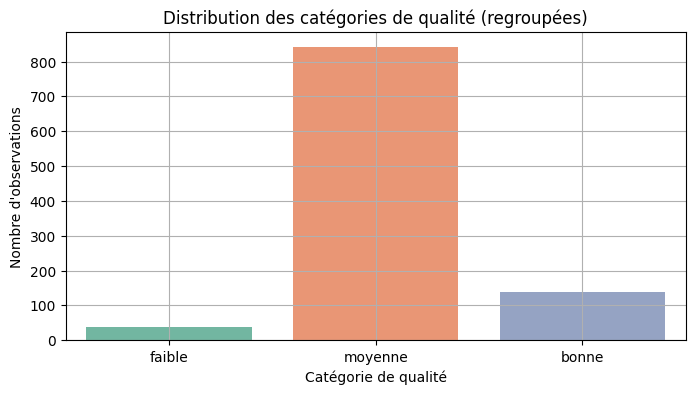

In [252]:
# Définition de la fonction pour regrouper les catégories de qualité

def regrouper_quality(q: Union[int, float]) -> str:
    """
    Regroupe les scores de qualité en trois catégories : faible, moyenne, bonne.

    Args:
        q (Union[int, float]): Score de qualité du vin.

    Returns:
        str: Catégorie de qualité ("faible", "moyenne", "bonne").
    """
    if q <= 4:
        return "faible"
    elif q <= 6:
        return "moyenne"
    else:
        return "bonne"


# Application de la fonction pour créer une nouvelle colonne "quality_cat"
data["quality_cat"] = data["quality"].apply(regrouper_quality)

# définir le type pour la nouvelle colonne
data["quality_cat"] = data["quality_cat"].astype(
    "category").cat.reorder_categories(["faible", "moyenne", "bonne"], ordered=True)

# Visualisation de la distribution des catégories de qualité
plt.figure(figsize=(8, 4))
sns.countplot(
    x="quality_cat",
    data=data,
    order=["faible", "moyenne", "bonne"],
    hue="quality_cat",
    palette="Set2",
    legend=False
)
plt.title("Distribution des catégories de qualité (regroupées)")
plt.xlabel("Catégorie de qualité")
plt.ylabel("Nombre d'observations")
plt.grid(True)
plt.show()

### b. Encodage et séparation des variables

Avant d'appliquer SMOTE, on encode les labels (`faible`, `moyenne`, `bonne`) en valeurs numériques.  
On extrait également les variables numériques (`float64`, `int64`) pour les utiliser comme features.

In [253]:
le: LabelEncoder = LabelEncoder()
data["quality_encoded"] = le.fit_transform(data["quality_cat"])

features: pd.Index = data.drop(columns=["quality", "quality_cat", "Id"], errors='ignore').select_dtypes(
    include=['float64', 'int64']).columns
X: pd.DataFrame = data[features]
Y: pd.Series = data["quality_encoded"]

### c. Visualisation avec PCA avant SMOTE

Nous utilisons une **PCA (Analyse en Composantes Principales)** pour projeter les données dans un espace 2D.  
Cela permet de visualiser la répartition des classes avant équilibrage.

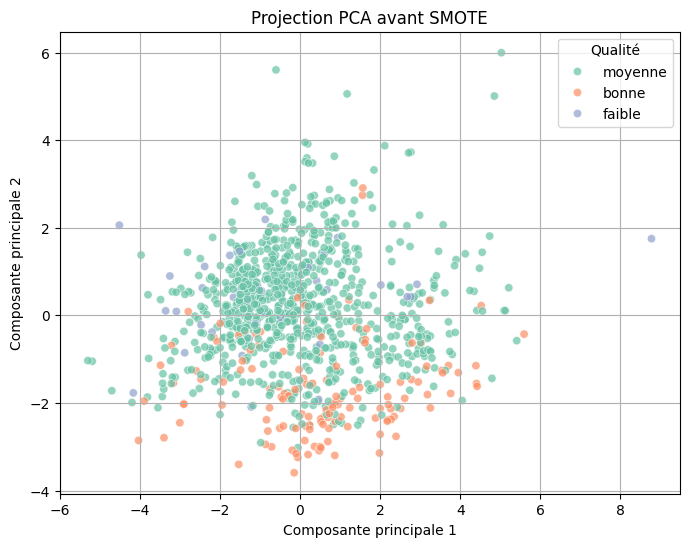

In [254]:
pca: PCA = PCA(n_components=2)
X_pca_before: pd.DataFrame = pca.fit_transform(X)

Y_labels_before: pd.Series = le.inverse_transform(Y)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_before[:, 0], y=X_pca_before[:, 1],
                hue=Y_labels_before, palette="Set2", alpha=0.7)
plt.title("Projection PCA avant SMOTE")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Qualité")
plt.grid(True)
plt.show()

In [255]:
# Sauvegarde du fichier avec les données normalisées et la qualité encodée
output_path: str = os.path.join(os.path.dirname(
    os.getcwd()), "data", 'WineQT_normalized.csv')
data.to_csv(output_path, index=True)
print(f"Fichier sauvegardé : {output_path}")

Fichier sauvegardé : c:\Users\pierr\Code\Python\wine-quality\data\WineQT_normalized.csv


#### d. Application de SMOTE pour équilibrer les classes

SMOTE génère des points synthétiques pour les classes minoritaires afin d'obtenir un dataset équilibré.  
Cela améliore l’apprentissage du modèle en évitant le biais vers la classe majoritaire.

In [256]:
#!Warning: X doit etre normalisé avant d'appliquer SMOTE

# Application de SMOTE
smote: SMOTE = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# Vérification du nouvel équilibre
_, counts = np.unique(Y_resampled, return_counts=True)
for i, count in enumerate(counts):
    print(f"Classe '{le.inverse_transform([i])[0]}' : {count} observations")

Classe 'bonne' : 842 observations
Classe 'faible' : 842 observations
Classe 'moyenne' : 842 observations


### e. Visualisation avec PCA après SMOTE

La nouvelle projection montre une **répartition plus équilibrée** entre les classes dans l’espace 2D.  
On peut voir que les classes rares occupent maintenant plus de place dans l’espace projeté.


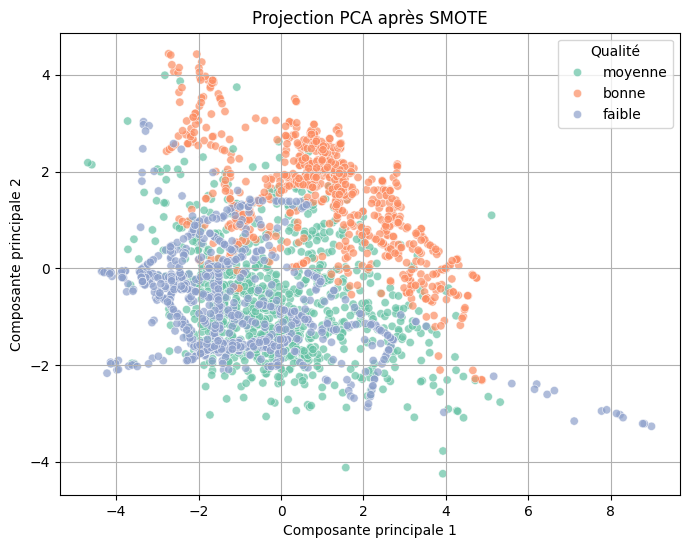

In [257]:
X_pca_after: pd.DataFrame = pca.fit_transform(X_resampled)
y_labels_after: pd.Series = le.inverse_transform(Y_resampled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_after[:, 0], y=X_pca_after[:, 1],
                hue=y_labels_after, palette="Set2", alpha=0.7)
plt.title("Projection PCA après SMOTE")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Qualité")
plt.grid(True)
plt.show()

In [258]:
# Reconstruction d’un DataFrame complet après SMOTE
data_smote: pd.DataFrame = pd.DataFrame(X_resampled, columns=features)
data_smote["quality_encoded"] = Y_resampled
data_smote["quality_cat"] = le.inverse_transform(Y_resampled)
data_smote.index.name = "Id"
data_smote.head()

# Sauvegarde du DataFrame après SMOTE
output_path: str = os.path.join(os.path.dirname(
    os.getcwd()), "data", 'WineQT_SMOTE.csv')
data_smote.to_csv(output_path, index=True)

### f. Résultat

Nous avons maintenant deux versions du dataset "Vinho Verde" prêtes pour l’analyse:

**`WineQT_normalized.csv`**

- Données réelles uniquement (1143 lignes).
- Variables normalisées.
- Conserve `quality`, `quality_cat`, `quality_encoded`.

**Utilisations :**
- Analyse exploratoire (EDA)
- Réduction de dimension (ACP)
- Régression
- Clustering


**`WineQT_SMOTE.csv`**

- Données équilibrées par SMOTE (2526 lignes).
- Variables normalisées.
- Contient `quality_cat` et `quality_encoded` seulement (pas de `quality`).

**Utilisations :**
- Classification supervisée équilibrée
- Arbres, k-NN, SVM, etc.